In [ ]:
#importing libraries

In [21]:
import warnings
warnings.filterwarnings("ignore")

%pip install imblearn
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import imblearn


Note: you may need to restart the kernel to use updated packages.


In [22]:
#Reading dataset into data frame

In [23]:
df=pd.read_csv('chronic_kidney_disease.csv')

In [24]:
df


,PATIENT_ID,PATIENT-AGE,BLD_PR,SPC_GRVT,ALBUMIN,SUGAR,RBC,PUS_CELL,BACTERIA,BLOOD_GLUC,...,POTASSIUM,HEMOGLBM,CELL_VOLUME,WBC_COUNT,RBC_COUNT,HYPER,D_MELLITUS,APPETITE,ANEMIA,CLASS
0,0,58.0,80.0,1.020,2.0,2.0,NaN,normal,notpresent,121.0,...,NaN,15.4,44.0,7800,5.2,yes,yes,good,no,ckd
1,1,43.0,50.0,1.020,3.0,1.0,NaN,normal,notpresent,210.0,...,NaN,11.3,38.0,6000,NaN,no,no,good,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,423.0,...,NaN,9.6,31.0,7500,NaN,no,yes,poor,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,notpresent,117.0,...,2.5,11.2,32.0,6700,3.9,yes,no,poor,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,106.0,...,NaN,11.6,35.0,7300,4.6,no,no,good,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,140.0,...,4.9,15.7,47.0,6700,4.9,no,no,good,no,notckd
387,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,75.0,...,3.5,16.5,54.0,7800,6.2,no,no,good,no,notckd
388,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,100.0,...,4.4,15.8,49.0,6600,5.4,no,no,good,no,notckd
389,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,114.0,...,4.9,14.2,51.0,7200,5.9,no,no,good,no,notckd


In [25]:
df.head()



,PATIENT_ID,PATIENT-AGE,BLD_PR,SPC_GRVT,ALBUMIN,SUGAR,RBC,PUS_CELL,BACTERIA,BLOOD_GLUC,...,POTASSIUM,HEMOGLBM,CELL_VOLUME,WBC_COUNT,RBC_COUNT,HYPER,D_MELLITUS,APPETITE,ANEMIA,CLASS
0,0,58.0,80.0,1.020,2.0,2.0,NaN,normal,notpresent,121.0,...,NaN,15.4,44.0,7800,5.2,yes,yes,good,no,ckd
1,1,43.0,50.0,1.020,3.0,1.0,NaN,normal,notpresent,210.0,...,NaN,11.3,38.0,6000,NaN,no,no,good,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,423.0,...,NaN,9.6,31.0,7500,NaN,no,yes,poor,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,notpresent,117.0,...,2.5,11.2,32.0,6700,3.9,yes,no,poor,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,106.0,...,NaN,11.6,35.0,7300,4.6,no,no,good,no,ckd


In [26]:
df.tail()


,PATIENT_ID,PATIENT-AGE,BLD_PR,SPC_GRVT,ALBUMIN,SUGAR,RBC,PUS_CELL,BACTERIA,BLOOD_GLUC,...,POTASSIUM,HEMOGLBM,CELL_VOLUME,WBC_COUNT,RBC_COUNT,HYPER,D_MELLITUS,APPETITE,ANEMIA,CLASS
386,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,140.0,...,4.9,15.7,47.0,6700,4.9,no,no,good,no,notckd
387,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,75.0,...,3.5,16.5,54.0,7800,6.2,no,no,good,no,notckd
388,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,100.0,...,4.4,15.8,49.0,6600,5.4,no,no,good,no,notckd
389,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,114.0,...,4.9,14.2,51.0,7200,5.9,no,no,good,no,notckd
390,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,131.0,...,3.5,15.8,53.0,6800,6.1,no,no,good,no,notckd


In [27]:
df.describe(include='all')
df.describe()


,PATIENT_ID,PATIENT-AGE,BLD_PR,SPC_GRVT,ALBUMIN,SUGAR,BLOOD_GLUC,BLOOD_UREA,CREATININE,SODIUM,POTASSIUM,HEMOGLBM,CELL_VOLUME
count,391.000000,382.000000,380.000000,344.000000,347.000000,345.000000,352.000000,376.000000,378.000000,309.000000,308.000000,344.000000,326.000000
mean,202.485934,51.651832,76.342105,1.017500,0.991354,0.481159,148.267045,56.907447,3.060450,137.597087,4.623052,12.549128,38.935583
std,115.135925,17.082684,13.784578,0.005702,1.331015,1.118200,78.823487,48.884986,5.754007,10.446693,3.212104,2.907856,8.958992
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000
25%,105.500000,42.000000,70.000000,1.010000,0.000000,0.000000,99.750000,27.000000,0.900000,135.000000,3.800000,10.400000,32.250000
50%,204.000000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.700000,40.000000
75%,301.500000,64.750000,80.000000,1.020000,2.000000,0.000000,165.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000
max,399.000000,90.000000,180.000000,1.025000,4.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PATIENT_ID   391 non-null    int64  
 1   PATIENT-AGE  382 non-null    float64
 2   BLD_PR       380 non-null    float64
 3   SPC_GRVT     344 non-null    float64
 4   ALBUMIN      347 non-null    float64
 5   SUGAR        345 non-null    float64
 6   RBC          243 non-null    object 
 7   PUS_CELL     326 non-null    object 
 8   BACTERIA     387 non-null    object 
 9   BLOOD_GLUC   352 non-null    float64
 10  BLOOD_UREA   376 non-null    float64
 11  CREATININE   378 non-null    float64
 12  SODIUM       309 non-null    float64
 13  POTASSIUM    308 non-null    float64
 14  HEMOGLBM     344 non-null    float64
 15  CELL_VOLUME  326 non-null    float64
 16  WBC_COUNT    294 non-null    object 
 17  RBC_COUNT    269 non-null    object 
 18  HYPER        389 non-null    object 
 19  D_MELLIT

In [29]:
df.isnull().sum()

PATIENT_ID       0
PATIENT-AGE      9
BLD_PR          11
SPC_GRVT        47
ALBUMIN         44
SUGAR           46
RBC            148
PUS_CELL        65
BACTERIA         4
BLOOD_GLUC      39
BLOOD_UREA      15
CREATININE      13
SODIUM          82
POTASSIUM       83
HEMOGLBM        47
CELL_VOLUME     65
WBC_COUNT       97
RBC_COUNT      122
HYPER            2
D_MELLITUS       2
APPETITE         1
ANEMIA           1
CLASS            0
dtype: int64

In [30]:
df.shape


(391, 23)

In [31]:
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns


In [32]:
df_imputed.isnull().sum()


PATIENT_ID     0
PATIENT-AGE    0
BLD_PR         0
SPC_GRVT       0
ALBUMIN        0
SUGAR          0
RBC            0
PUS_CELL       0
BACTERIA       0
BLOOD_GLUC     0
BLOOD_UREA     0
CREATININE     0
SODIUM         0
POTASSIUM      0
HEMOGLBM       0
CELL_VOLUME    0
WBC_COUNT      0
RBC_COUNT      0
HYPER          0
D_MELLITUS     0
APPETITE       0
ANEMIA         0
CLASS          0
dtype: int64

In [33]:
df_imputed.columns

Index(['PATIENT_ID', 'PATIENT-AGE', 'BLD_PR', 'SPC_GRVT', 'ALBUMIN', 'SUGAR',
       'RBC', 'PUS_CELL', 'BACTERIA', 'BLOOD_GLUC', 'BLOOD_UREA', 'CREATININE',
       'SODIUM', 'POTASSIUM', 'HEMOGLBM', 'CELL_VOLUME', 'WBC_COUNT',
       'RBC_COUNT', 'HYPER', 'D_MELLITUS', 'APPETITE', 'ANEMIA', 'CLASS'],
      dtype='object')

In [34]:
df_imputed.dtypes


PATIENT_ID     object
PATIENT-AGE    object
BLD_PR         object
SPC_GRVT       object
ALBUMIN        object
SUGAR          object
RBC            object
PUS_CELL       object
BACTERIA       object
BLOOD_GLUC     object
BLOOD_UREA     object
CREATININE     object
SODIUM         object
POTASSIUM      object
HEMOGLBM       object
CELL_VOLUME    object
WBC_COUNT      object
RBC_COUNT      object
HYPER          object
D_MELLITUS     object
APPETITE       object
ANEMIA         object
CLASS          object
dtype: object

In [35]:
for i in df.select_dtypes(exclude=['object']).columns:
    df_imputed[i]=df_imputed[i].apply(lambda x :float(x))

In [36]:
df_imputed.dtypes


PATIENT_ID     float64
PATIENT-AGE    float64
BLD_PR         float64
SPC_GRVT       float64
ALBUMIN        float64
SUGAR          float64
RBC             object
PUS_CELL        object
BACTERIA        object
BLOOD_GLUC     float64
BLOOD_UREA     float64
CREATININE     float64
SODIUM         float64
POTASSIUM      float64
HEMOGLBM       float64
CELL_VOLUME    float64
WBC_COUNT       object
RBC_COUNT       object
HYPER           object
D_MELLITUS      object
APPETITE        object
ANEMIA          object
CLASS           object
dtype: object

In [37]:
for i in df_imputed.columns:
    print('___________________________________________',i,'________________________________________')   
    print(set(df_imputed[i].tolist()))
    
print()
    

___________________________________________ PATIENT_ID ________________________________________
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 56.0, 57.0, 58.0, 59.0, 61.0, 62.0, 63.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.

In [38]:
print(df_imputed['RBC_COUNT'].mode())
print(df_imputed['WBC_COUNT'].mode())


0    5.2
Name: RBC_COUNT, dtype: object
0    9800
Name: WBC_COUNT, dtype: object


In [39]:
df_imputed["CLASS"]=df_imputed["CLASS"].apply(lambda x:"ckd" if x=="ckd\t" else x)


df_imputed["D_MELLITUS"]=df_imputed["D_MELLITUS"].apply(lambda x:"yes" if x=="\tyes" else x)
df_imputed["D_MELLITUS"]=df_imputed["D_MELLITUS"].apply(lambda x:"no" if x=="\tno" else x)
df_imputed["D_MELLITUS"]=df_imputed["D_MELLITUS"].apply(lambda x:"yes" if x==" yes" else x)

df_imputed["RBC_COUNT"]=df_imputed["RBC_COUNT"].apply(lambda x:"5.2" if x=="\t?" else x)

df_imputed["WBC_COUNT"]=df_imputed["WBC_COUNT"].apply(lambda x:"9800" if x=="\t?" else x)
df_imputed["WBC_COUNT"]=df_imputed["WBC_COUNT"].apply(lambda x:"9800" if x=="\t6200" else x)
df_imputed["WBC_COUNT"]=df_imputed["WBC_COUNT"].apply(lambda x:"9800" if x=="\t8400" else x)

df_imputed.describe(include='all')
df_imputed.describe()
df_imputed['CLASS'].value_counts()


ckd       241
notckd    150
Name: CLASS, dtype: int64

In [40]:

df_imputed['D_MELLITUS'].value_counts()

no     257
yes    134
Name: D_MELLITUS, dtype: int64

In [41]:

df_imputed['RBC_COUNT'].value_counts()

5.2    141
4.5     16
4.9     14
4.7     11
5       10
3.9     10
4.8     10
4.6      9
3.4      9
5.9      8
3.7      8
6.1      8
5.5      8
5.4      7
5.3      7
5.8      7
3.8      7
4.2      6
4.3      6
4        6
5.6      6
5.1      5
6.2      5
6.4      5
5.7      5
6.5      5
4.4      5
3.2      5
4.1      5
6        4
3.6      4
6.3      4
3        3
3.5      3
2.5      2
2.6      2
2.8      2
2.9      2
2.7      2
3.3      2
2.1      2
3.1      2
2.3      1
2.4      1
8        1
Name: RBC_COUNT, dtype: int64

In [42]:
df_imputed.describe(include='all')
df_imputed.describe()
df_imputed['WBC_COUNT'].value_counts()

9800     111
6700      10
9200       9
9600       9
7200       9
        ... 
19100      1
12300      1
16700      1
14900      1
2600       1
Name: WBC_COUNT, Length: 89, dtype: int64

In [43]:
from sklearn import preprocessing
df_encoder=df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_encoder

,PATIENT_ID,PATIENT-AGE,BLD_PR,SPC_GRVT,ALBUMIN,SUGAR,RBC,PUS_CELL,BACTERIA,BLOOD_GLUC,...,POTASSIUM,HEMOGLBM,CELL_VOLUME,WBC_COUNT,RBC_COUNT,HYPER,D_MELLITUS,APPETITE,ANEMIA,CLASS
0,0,49,3,3,2,2,1,1,0,48,...,8,90,31,69,30,1,1,0,0,0
1,1,34,0,3,3,1,1,1,0,92,...,8,49,25,53,30,0,0,0,0,0
2,2,53,3,1,2,3,1,1,0,140,...,8,32,18,67,30,0,1,1,1,0
3,3,39,2,0,4,0,1,0,0,44,...,0,48,19,59,17,1,0,1,1,0
4,4,42,3,1,2,0,1,1,0,33,...,8,52,22,65,24,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,386,46,3,3,0,0,1,1,0,64,...,22,93,34,59,27,0,0,0,0,1
387,387,33,2,4,0,0,1,1,0,3,...,8,101,41,69,40,0,0,0,0,1
388,388,7,3,3,0,0,1,1,0,27,...,17,94,36,58,32,0,0,0,0,1
389,389,10,1,4,0,0,1,1,0,41,...,22,78,38,64,37,0,0,0,0,1


In [44]:
X=df_encoder.drop(['PATIENT_ID','CLASS'],axis=1)
Y=df_encoder['CLASS']

X
Y

0      0
1      0
2      0
3      0
4      0
      ..
386    1
387    1
388    1
389    1
390    1
Name: CLASS, Length: 391, dtype: int32

In [45]:
df_encoder['CLASS'].value_counts()


0    241
1    150
Name: CLASS, dtype: int64

<AxesSubplot:xlabel='CLASS', ylabel='count'>

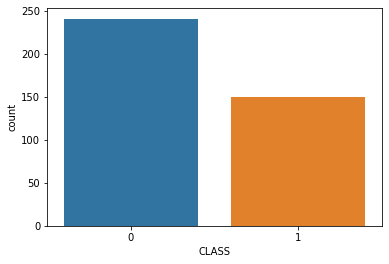

In [46]:
sns.countplot(df_encoder['CLASS'])

<AxesSubplot:xlabel='CLASS', ylabel='count'>

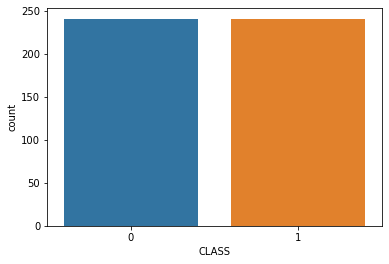

In [47]:
from imblearn.over_sampling import RandomOverSampler
resampler=RandomOverSampler(random_state=0)
X_oversampled,Y_oversampled=resampler.fit_resample(X,Y)


sns.countplot(Y_oversampled)

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X_oversampled)
Y=Y_oversampled

In [49]:
from sklearn.decomposition import PCA
pca=PCA(.95)
X_PCA=pca.fit_transform(X)
print(X.shape)
print(X_PCA.shape)

(482, 21)
(482, 17)


In [ ]:
# spliting the dataset  into training  and testing sets

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_PCA,Y,test_size=0.3,stratify=Y,random_state=99)

In [70]:
# Classification using Decision Tree Algorithm

In [71]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [72]:
Y_pred=classifier.predict(X_test)
print(Y_pred)


[1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0
 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1]


In [73]:
print(Y_test)

245    1
371    1
453    1
146    0
401    1
      ..
59     0
267    1
236    0
215    0
407    1
Name: CLASS, Length: 145, dtype: int32


In [74]:
from sklearn import metrics
acc=metrics.accuracy_score(Y_test,Y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(Y_test,Y_pred)
print('confusion Matrix:')
print(cm,'\n\n')
print('--------------------')
result=metrics.classification_report(Y_test,Y_pred)
print('classification')
print(result)

accuracy:0.97


confusion Matrix:
[[70  2]
 [ 2 71]] 


--------------------
classification
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.97      0.97      0.97        73

    accuracy                           0.97       145
   macro avg       0.97      0.97      0.97       145
weighted avg       0.97      0.97      0.97       145



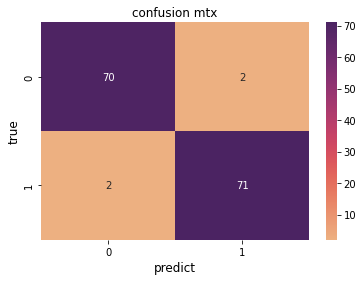

In [57]:
ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("predict",fontsize=12)
plt.ylabel("true",fontsize=12)
plt.title("confusion mtx",fontsize=12)
plt.show()




In [75]:
#classification using KNN Algorithm

In [81]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [82]:
Y_pred=classifier.predict(X_test)
print(Y_pred)


[1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1
 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0
 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1
 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1]


In [83]:
print(Y_test)

245    1
371    1
453    1
146    0
401    1
      ..
59     0
267    1
236    0
215    0
407    1
Name: CLASS, Length: 145, dtype: int32


In [84]:
from sklearn import metrics
acc=metrics.accuracy_score(Y_test,Y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(Y_test,Y_pred)
print('confusion Matrix:')
print(cm,'\n\n')
print('--------------------')
result=metrics.classification_report(Y_test,Y_pred)
print('classification')
print(result)

accuracy:0.94


confusion Matrix:
[[64  8]
 [ 0 73]] 


--------------------
classification
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        72
           1       0.90      1.00      0.95        73

    accuracy                           0.94       145
   macro avg       0.95      0.94      0.94       145
weighted avg       0.95      0.94      0.94       145



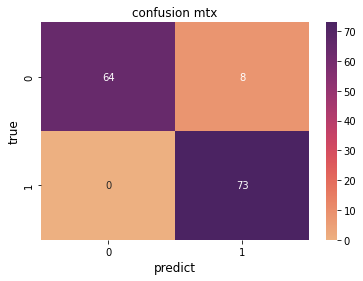

In [85]:
ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("predict",fontsize=12)
plt.ylabel("true",fontsize=12)
plt.title("confusion mtx",fontsize=12)
plt.show()
